In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
boston_listings_data = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data/Boston/2021-09-19/data/listings.csv.gz')
boston_listings_data.shape

Backing off send_request(...) for 0.6s (requests.exceptions.ConnectionError: HTTPSConnectionPool(host='api.segment.io', port=443): Max retries exceeded with url: /v1/batch (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f9f2accc1f0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')))


(3123, 74)

In [3]:
boston_listings_vis = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data/Boston/2021-09-19/visualisations/listings.csv')
boston_listings_vis.head()
boston_listings_vis.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'], dtype='object')

In [4]:
boston_reviews_vis = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data/Boston/2021-09-19/visualisations/reviews.csv')
boston_reviews_vis.head()
boston_reviews_vis.columns

Index(['listing_id', 'date'], dtype='object')

In [5]:
boston_listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210919145601,2021-09-19,HARBORSIDE-Walk to subway,"Fully separate apartment in a two apartment building. Space is perfect for an individual or a couple. There is a full bath, bedroom with queen bed, small sitting area with TV and a fully equipped kitchen with dining area. Walk or bus to subway.<br /><br /><b>The space</b><br />This is a totally separate apartment located on the first floor of a 3 story building. Apartment has one bedroom with queen sized bed plus full eat-in kitchen,sitting room and full bath with tub/shower. Free off street parking for one car. SORRY NO SNOW REMOVAL SERVICE FOR CAR. Free wi-fi <br /><br />10 minute walk/5 minute bus (3 doors away) to subway station--next stop is Aquarium/Faneuil Hall in central Boston. <br /><br />Guests who have stayed in our apartment have used it as a home base to explore Boston and surroundings. Others during extended stays at the apartment have commuted to Massachusetts General Hospital (MGH) and Massachusetts Institute of Technology (MIT). <br /><br />The harbor and harbor wa","Mostly quiet ( no loud music, no crowed sidewalks) area with residential 3 story buildings, some 4 and 5 story newer buildings. Though not in an ""entertainment"" area there are local food shops and supermarket with a mix of restaurants. Area is in transition--East Boston has a great waterfront with gentrification evident everywhere!",https://a0.muscache.com/pictures/24670/b2de0442_original.jpg,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,"My wife and I and grown children frequently occupy the spaces that we rent and as such try to make the spaces pleasant and appealing to ourselves as well as guests. We have been subletting for over 15 years and consider ourselves helpful and organized hosts who provide clean, attractive and comfortable apartments",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/4804/profile_pic/1327953150/original.jpg?aki_policy=profile_x_medium,East Boston,5,5,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Heating"", ""Refrigerator"", ""Essentials"", ""Coffee maker"", ""Dishwasher"", ""Dedicated workspace"", ""Kitchen"", ""Oven"", ""Cable TV"", ""Microwave"", ""Patio or balcony"", ""Wifi"", ""Carbon monoxide alarm"", ""Hair dryer"", ""TV with standard cable"", ""Extra pillows and blankets"", ""Bed linens"", ""Hot water"", ""Dryer"", ""Smoke alarm"", ""Long term stays allowed"", ""Iron"", ""Free s

In [6]:
boston_listings_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
       'availa

In [23]:
boston_df = boston_listings_data[['id','name', 'host_id', 'host_name', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm',
                                 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
boston_df
                                 

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3781,HARBORSIDE-Walk to subway,4804,Frank,42.364130,-71.029910,Entire home/apt,$125.00,32,21,2021-07-25,0.29,1,153,4,4.95,5.00,4.95,5.00,4.95,4.86,4.90
1,5506,** Private! Minutes to center!**,8229,Terry,42.329810,-71.095590,Entire home/apt,$124.00,3,108,2021-07-19,0.90,10,46,1,4.77,4.87,4.89,4.95,4.89,4.53,4.77
2,6695,Home Away from Home! Condo,8229,Terry,42.329940,-71.093510,Entire home/apt,$169.00,3,115,2019-11-02,1.33,10,62,0,4.79,4.81,4.86,4.90,4.95,4.48,4.70
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,42.359190,-71.062650,Entire home/apt,$110.00,91,25,2019-09-30,0.30,5,310,0,4.64,4.68,4.56,4.96,4.96,4.96,4.56
4,10730,Bright 1bed facing Golden Dome,26988,Anne,42.358400,-71.061850,Entire home/apt,$100.00,91,32,2020-04-16,0.40,5,277,0,4.78,4.78,4.52,4.96,4.92,4.96,4.43
5,10813,"Back Bay Apt-blocks to subway, Newbury St, The Pru",38997,Michelle,42.350610,-71.087870,Entire home/apt,$116.00,29,5,2020-12-02,0.16,11,329,1,5.00,5.00,4.75,5.00,5.00,5.00,4.75
6,10986,North End (Waterfront area) CLOSE TO MGH & SUBWAY,38997,Michelle,42.363520,-71.050750,Entire home/apt,$106.00,33,2,2016-05-23,0.03,11,323,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
7,13247,Back Bay studio apartment,51637,Susan,42.351640,-71.087520,Entire home/apt,$75.00,91,0,NaN,NaN,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,16384,Small Room in Cambridge Kendall MIT,23078,Eric,42.358100,-71.071320,Private room,$50.00,91,0,NaN,NaN,1,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18711,The Dorset Redline | 3BR 1BA | Short walk to Redline for Mass General and UMass!,71783,Lance,42.322120,-71.060960,Entire home/apt,$111.00,30,52,2019-10-05,0.96,27,274,0,4.30,4.51,4.72,4.55,4.47,4.27,4.47


In [21]:
boston_df_reviews = boston_df.copy()
boston_df_reviews[['id', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']].dropna(axis=0, inplace=True)

In [22]:
boston_df_reviews.shape, boston_df.shape

((3123, 22), (3123, 22))

In [27]:
boston_df_reviews['review_scores_rating'].value_counts()

5.00    483
4.00     82
4.50     71
4.67     61
4.88     58
4.75     50
4.80     46
4.89     44
4.86     43
4.83     40
4.73     38
4.92     37
4.95     37
4.91     35
4.85     35
4.90     34
4.93     34
4.96     32
4.82     31
4.71     31
4.84     30
4.64     30
4.78     27
4.33     27
4.94     26
4.76     26
4.60     25
4.87     25
4.68     25
4.98     24
4.81     24
4.79     23
4.70     23
4.69     23
4.63     22
4.72     21
4.77     21
4.57     21
4.97     20
4.74     20
4.65     17
4.40     17
4.25     17
3.00     16
4.62     16
4.38     15
4.44     14
4.61     14
4.56     14
4.58     13
4.43     12
4.53     12
4.66     12
4.45     12
0.00     12
4.54     11
4.48     11
3.50     11
4.47     10
4.52     10
4.49     10
4.55      9
4.36      9
4.20      9
4.29      8
4.99      8
4.59      8
4.31      8
4.39      7
4.30      7
4.27      6
4.46      6
2.00      6
4.18      5
4.22      5
4.41      5
1.00      5
3.67      5
3.75      5
4.34      4
4.14      4
4.35      4
4.26      4
4.42

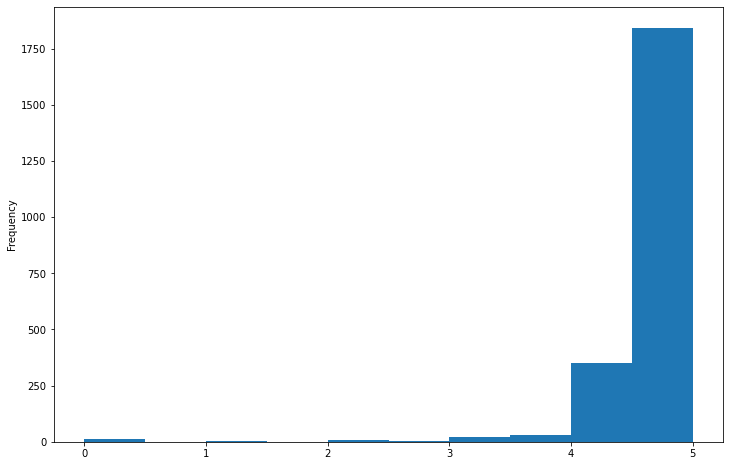

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
boston_df_reviews['review_scores_rating'].plot(kind='hist', ax=ax)
plt.show()

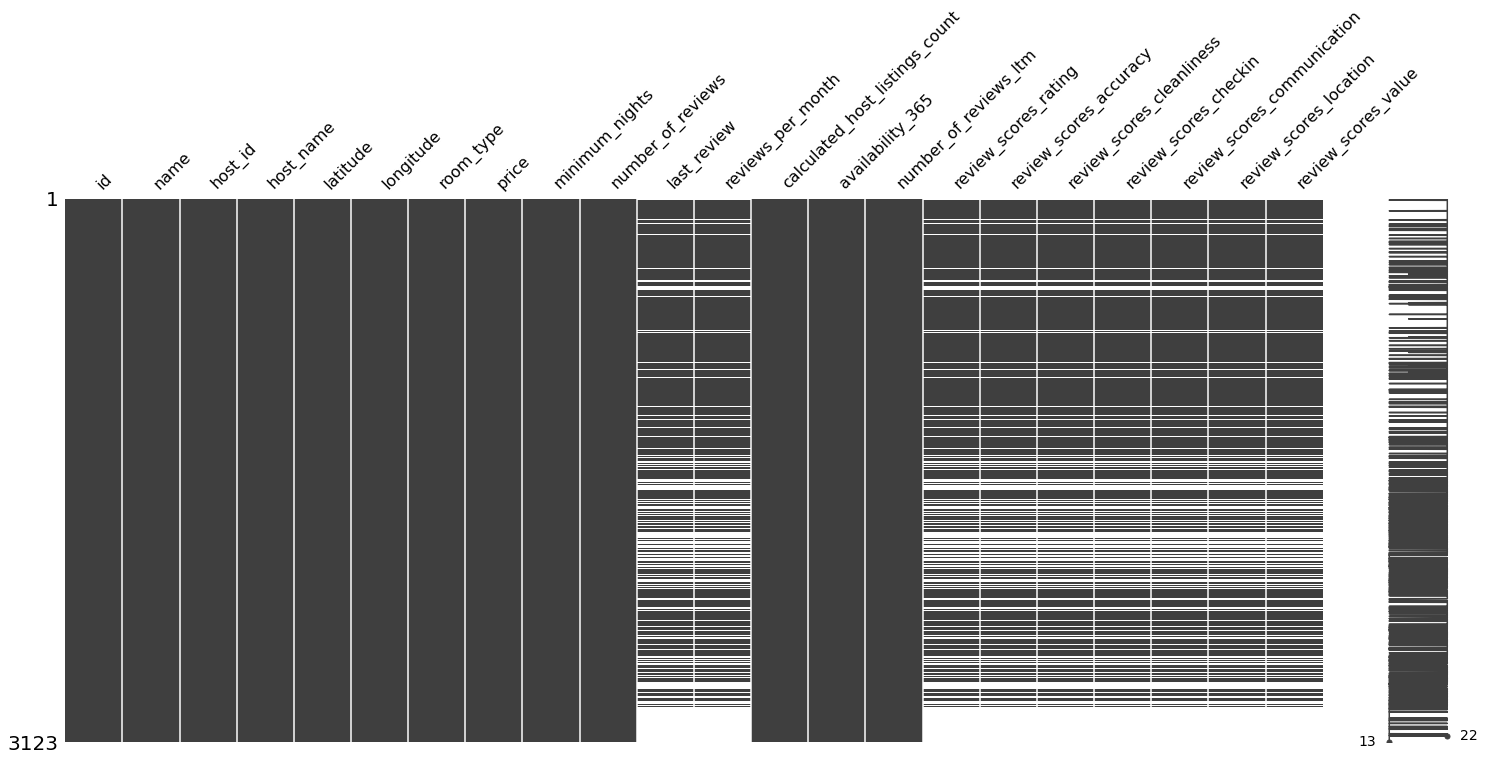

In [32]:
import missingno as msno
ax = msno.matrix(boston_df_reviews)

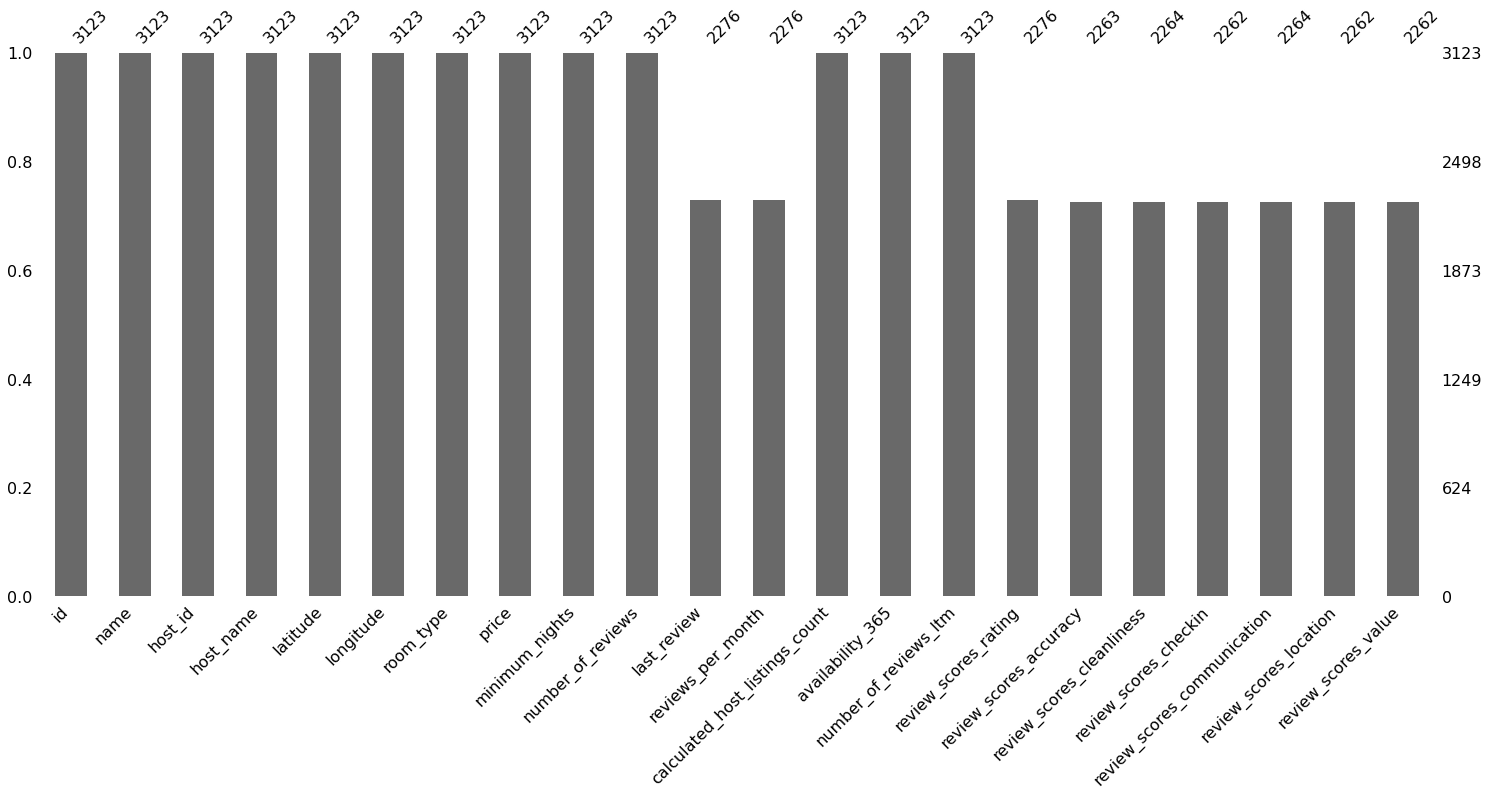

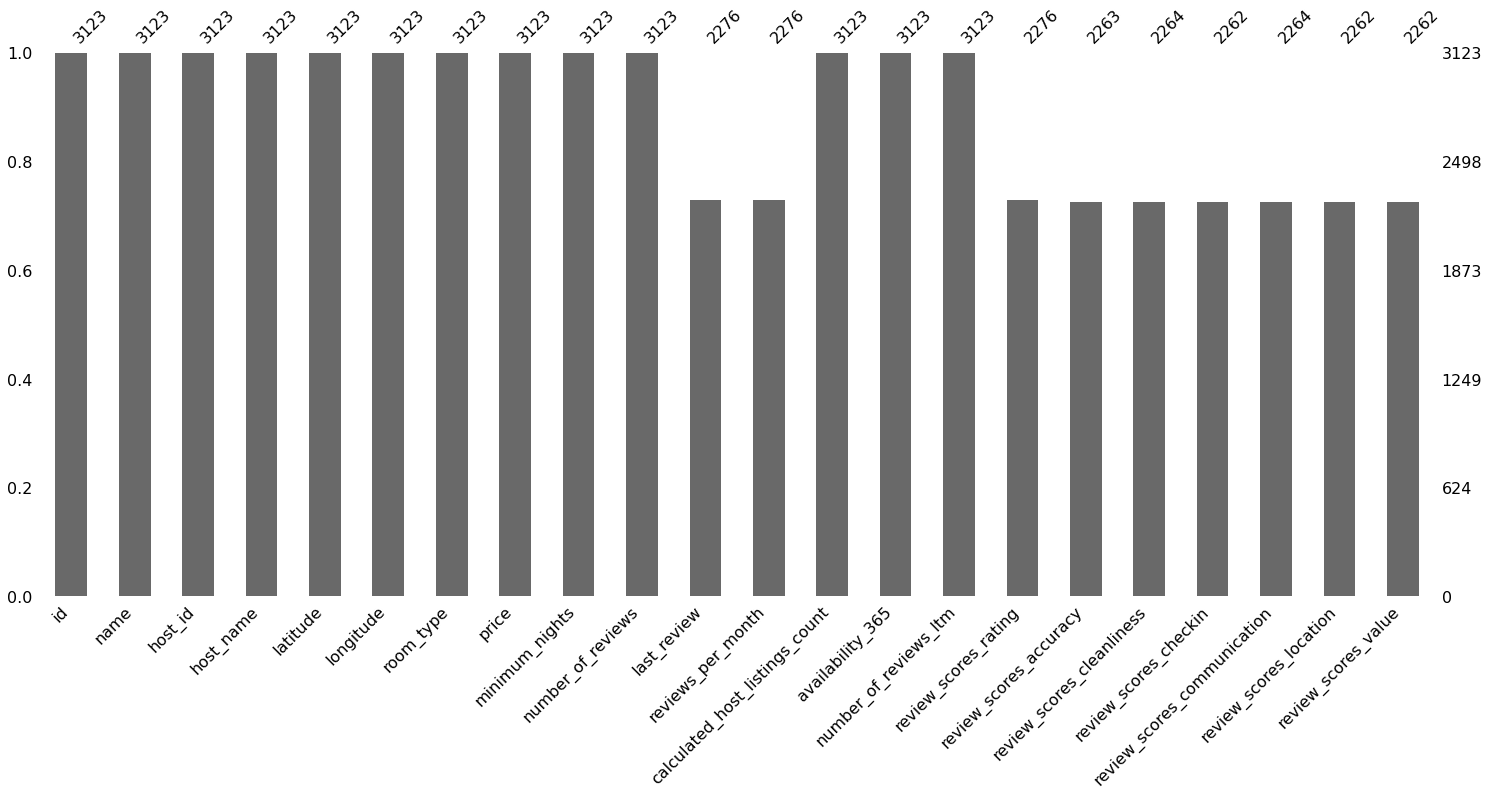

In [33]:
ax1 = msno.bar(boston_df_reviews)
ax1.get_figure()